In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df= pd.read_csv("Advertising.csv", index_col = 0)

In [3]:
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data_df.shape

(200, 4)

In [6]:
X = data_df[["TV","radio"]].to_numpy()
Y = data_df[["sales"]].to_numpy()

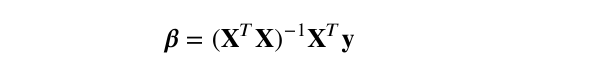

In [8]:
X = np.concat(
    (np.ones((data_df.shape[0],1)),X),
    axis = 1
)

In [9]:
betas = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(Y)
betas = betas.flatten()
print(f"y = {betas[0]:.3f} + {betas[1]:.3f} x1 + {betas[2]:.3f}  x2")

y = 2.921 + 0.046 x1 + 0.188  x2


# SKlearn Implementation

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [11]:
# X = data_df.drop("sales", axis=1).to_numpy()
X = data_df[["TV","radio"]].to_numpy()
Y = data_df[["sales"]].to_numpy()


In [12]:
scaler = StandardScaler()
scaler_X = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaler_X, Y, test_size=0.2, random_state=999)

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [15]:
lin_reg.intercept_

array([14.04579812])

In [16]:
lin_reg.coef_

array([[3.90059476, 2.66683444]])

In [17]:
y_pred = lin_reg.predict(X_test)

In [18]:
mean_absolute_error(y_test, y_pred)

1.268229950045677

In [19]:
r2_score(y_test, y_pred)

0.8948652390616871